In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-21 15:38:45,232: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
#Will execute on QASM simulator
def execute_circuit(quantum_circuit):
    # Create a qasm simulator
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(quantum_circuit, simulator, shots=1024).result()
    results = result.get_counts(quantum_circuit)
    circuit_diagram = quantum_circuit.draw()
    histogram = plot_histogram(results)
    return results, circuit_diagram, histogram

In [5]:
#CNOT-gate
# Create a 2 qubit circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
result, img, histogram = execute_circuit(qc)

In [6]:
result

{'00': 502, '11': 522}

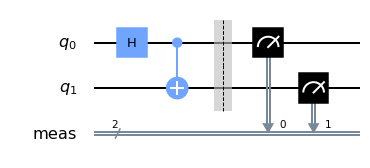

In [7]:
img

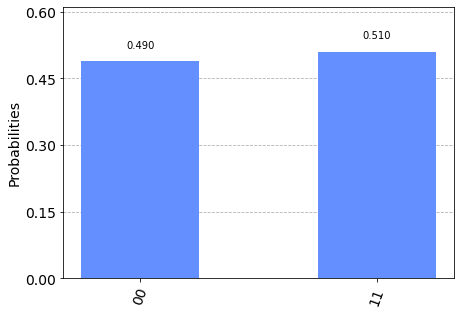

In [8]:
histogram

In [13]:
def execute_circuit_sv(quantum_circuit):
    #Create a state vector simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')
    result = execute(quantum_circuit, statevector_simulator).result()
    statevector_results = result.get_statevector(quantum_circuit)
    circuit_diagram = quantum_circuit.draw()
    q_sphere = plot_state_qsphere(statevector_results)
    
    return statevector_results, circuit_diagram, q_sphere

In [17]:
#Toffoli (CCx)-gate
from math import pi
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
result, img, qsphere = execute_circuit_sv(qc)

In [18]:
result

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

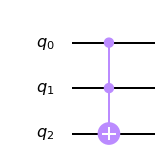

In [19]:
img

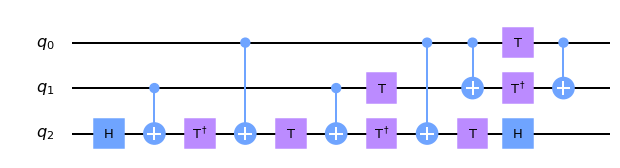

In [20]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()

In [21]:
#Swap gate
from math import pi
qc = QuantumCircuit(2)
qc.x(0)
qc.swap(0,1)
result, img, qsphere = execute_circuit_sv(qc)

In [22]:
result

array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])

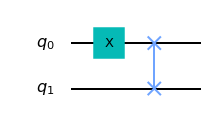

In [23]:
img

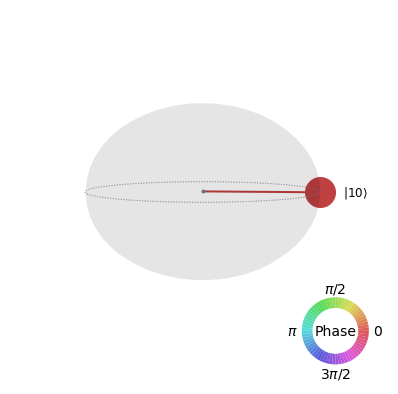

In [24]:
qsphere